# Brief Overview: 
Entering high school students make program choices among vocational program and academic program. Their choice might be modeled using their writing score and their social economic status.
**Academic Programs** are more likely to demand essays and logical reasoning, whereas **vocational Programs** are about practical hands-on training and learning tangible skills.
The basic difference between these two is theory versus practice. An academic school generally teaches theoretical knowledge and broad-based research skills, while a vocational school teaches hands-on, applied skills such as carpentry, auto mechanics and hairdressing.

**University of Tesas wants to launch some new programs and want to know there target audience(Which student should be be pitched for which course/program). They hired you to do the analysis and predict which program a student will choose out of Academic Programs and Vocational Programs on the bases of the information given such as socio-economic status, the type of school attended (public or private), gender and their prior reading, writing, maths and science scores.**

## Upload Required Libraries

In [3]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")


## Importing data

In [4]:
df=pd.read_csv("Program_Choice.csv",index_col=0)

In [5]:
df.head()

,id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
0,45.0,female,low,public,vocation,34.0,35.0,41.0,29.0,26.0,not enrolled,0.0,1
1,108.0,male,middle,public,vocation,34.0,33.0,41.0,36.0,36.0,not enrolled,0.0,1
2,15.0,male,high,public,vocation,39.0,39.0,44.0,26.0,42.0,not enrolled,0.0,1
3,67.0,male,low,public,vocation,37.0,37.0,42.0,33.0,32.0,not enrolled,0.0,1
4,153.0,male,middle,public,vocation,39.0,31.0,40.0,39.0,51.0,not enrolled,0.0,1


## EDA

**Shape**

In [6]:
# Shape of the dataframe
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  200 
no. of columns:  13


**Data type of data features**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       200 non-null    float64
 1   female   200 non-null    object 
 2   ses      200 non-null    object 
 3   schtyp   200 non-null    object 
 4   prog     200 non-null    object 
 5   read     200 non-null    float64
 6   write    200 non-null    float64
 7   math     200 non-null    float64
 8   science  200 non-null    float64
 9   socst    200 non-null    float64
 10  honors   200 non-null    object 
 11  awards   200 non-null    float64
 12  cid      200 non-null    int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 21.9+ KB


**Null value Check**

In [8]:
# Handling missing data
# Test whether there is any null value in our dataset or not. We can do this using isnull() method.
df.isnull().sum()

id         0
female     0
ses        0
schtyp     0
prog       0
read       0
write      0
math       0
science    0
socst      0
honors     0
awards     0
cid        0
dtype: int64

Droping "id" as it is insignificant

In [9]:
df.drop("id",axis=1,inplace =True)

**Making different list for categorical columns and numerical columns**


In [10]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

    

['female', 'ses', 'schtyp', 'prog', 'honors']
['read', 'write', 'math', 'science', 'socst', 'awards', 'cid']


The above output shows that there is no “null” value in our dataset.

Let’s try to test whether any categorical attribute contains a “?” in it or not. At times there exists “?” or ” ” in place of 
missing values. Using the below code snippet we are going to test whether adult_df data frame consists of categorical variables 
with values as “?”.

In [11]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

female : 0
ses : 0
schtyp : 0
prog : 0
honors : 0


The output of the above code snippet shows that there are "?" or " " present in the data set

# Data preprocessing




we need some summary statistics of our dataframe. For this, we can use describe() 
method. It can be used to generate various summary statistics.

#### Describe for numerical and categorical columns


In [12]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
read,200.0,52.230,10.252937,28.0,44.00,50.0,60.0,76.0
write,200.0,52.775,9.478586,31.0,45.75,54.0,60.0,67.0
math,200.0,52.645,9.368448,33.0,45.00,52.0,59.0,75.0
science,200.0,51.850,9.900891,26.0,44.00,53.0,58.0,74.0
socst,200.0,52.405,10.735793,26.0,46.00,52.0,61.0,71.0
awards,200.0,1.670,1.818691,0.0,0.00,1.0,2.0,7.0
cid,200.0,10.430,5.801152,1.0,5.00,10.5,15.0,20.0


In [13]:
df[cat].describe().T

,count,unique,top,freq
female,200,2,female,109
ses,200,3,middle,95
schtyp,200,2,public,168
prog,200,2,academic,105
honors,200,2,not enrolled,147


**Are there any duplicate records, Check for duplicate data**

In [14]:

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid


In [15]:
## df.drop_duplicates(inplace=True) If present we can drop them like this

### unique values for categorical variables

In [16]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

FEMALE :  2
male       91
female    109
Name: female, dtype: int64


SES :  3
low       47
high      58
middle    95
Name: ses, dtype: int64


SCHTYP :  2
private     32
public     168
Name: schtyp, dtype: int64


PROG :  2
vocation     95
academic    105
Name: prog, dtype: int64


HONORS :  2
enrolled         53
not enrolled    147
Name: honors, dtype: int64




**Univariate Analysis**

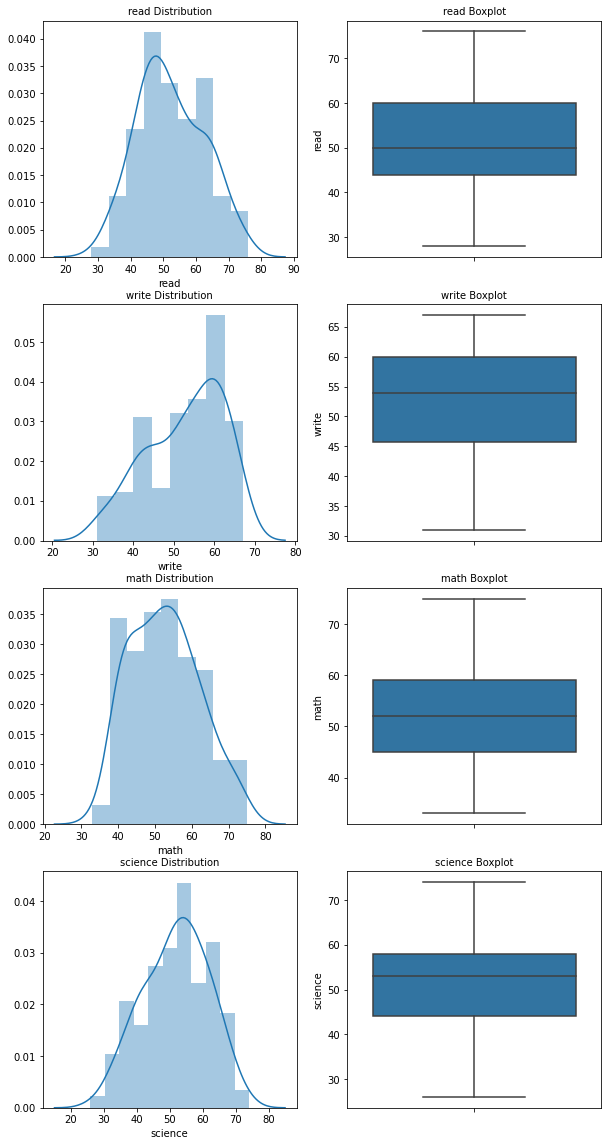

In [17]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['read'] , ax=axes[0][0])
a.set_title("read Distribution",fontsize=10)

a = sns.boxplot(df['read'] , orient = "v" , ax=axes[0][1])
a.set_title("read Boxplot",fontsize=10)

a = sns.distplot(df['write'] , ax=axes[1][0])
a.set_title("write Distribution",fontsize=10)

a = sns.boxplot(df['write'] , orient = "v" , ax=axes[1][1])
a.set_title("write Boxplot",fontsize=10)


a = sns.distplot(df['math'] , ax=axes[2][0])
a.set_title("math Distribution",fontsize=10)

a = sns.boxplot(df['math'] , orient = "v" , ax=axes[2][1])
a.set_title("math Boxplot",fontsize=10)


a = sns.distplot(df['science'] , ax=axes[3][0])
a.set_title("science Distribution",fontsize=10)

a = sns.boxplot(df['science'] , orient = "v" , ax=axes[3][1])
a.set_title("science Boxplot",fontsize=10)

plt.show()

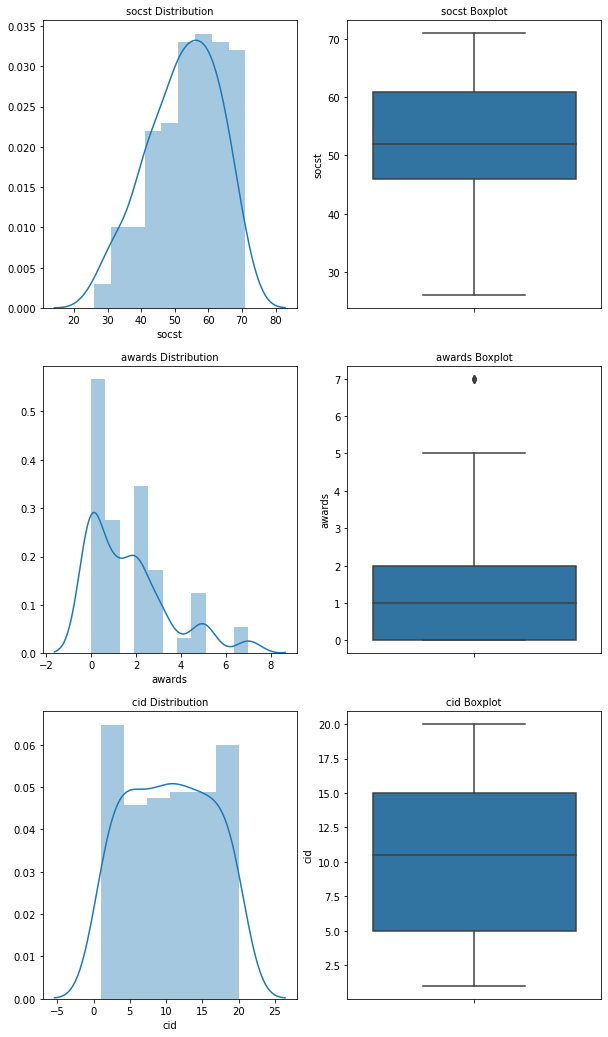

In [18]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(df['socst'] , ax=axes[0][0])
a.set_title("socst Distribution",fontsize=10)

a = sns.boxplot(df['socst'] , orient = "v" , ax=axes[0][1])
a.set_title("socst Boxplot",fontsize=10)

a = sns.distplot(df['awards'] , ax=axes[1][0])
a.set_title("awards Distribution",fontsize=10)

a = sns.boxplot(df['awards'] , orient = "v" , ax=axes[1][1])
a.set_title("awards Boxplot",fontsize=10)

a = sns.distplot(df['cid'] , ax=axes[2][0])
a.set_title("cid Distribution",fontsize=10)

a = sns.boxplot(df['cid'] , orient = "v" , ax=axes[2][1])
a.set_title("cid Boxplot",fontsize=10)
plt.show()

###  Bivariate and Multivariate Analysis

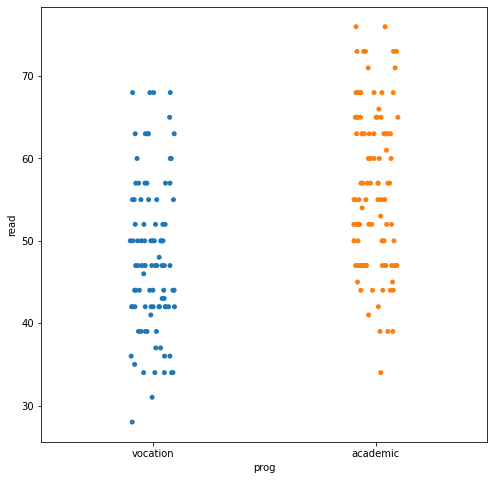

In [19]:
plt.figure(figsize=(8,8))
sns.stripplot(df["prog"], df['read'], jitter=True) 
plt.show()

**Students who got marks above 70 in Reading Skills have chosen Academic Program**

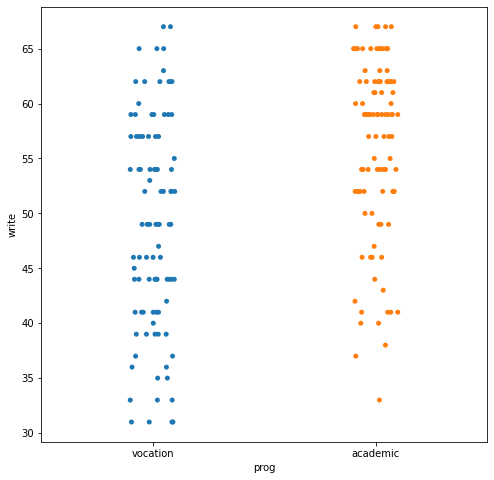

In [20]:
plt.figure(figsize=(8,8))
sns.stripplot(df["prog"], df['write'], jitter=True) 
plt.show()

**Students who got marks below 35 in writing Skills have mostly chosen vocation Program, Rest distribution is similar**

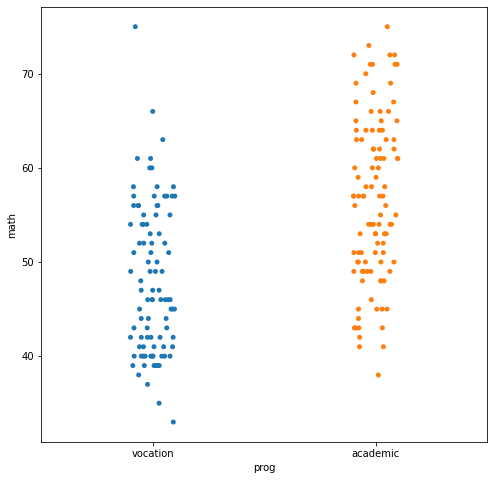

In [21]:
plt.figure(figsize=(8,8))
sns.stripplot(df["prog"], df['math'], jitter=True) 
plt.show()

**Students having higher marks in Maths tends to choose Academic as there Program(>60)**

With high capital_gain probability of getting income >50K is also high.

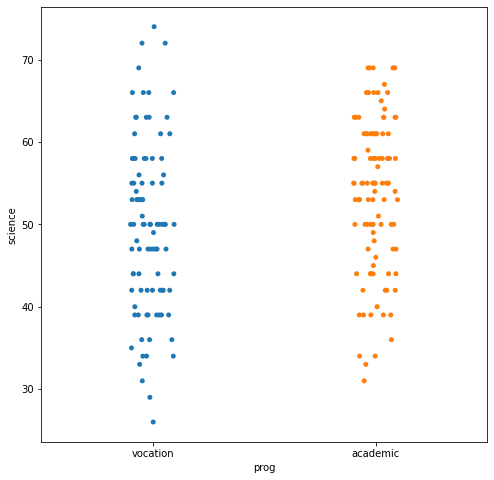

In [22]:
plt.figure(figsize=(8,8))
sns.stripplot(df["prog"], df['science'], jitter=True) 
plt.show()

**Here students having the highest marks and lowest marks in science have chosen vocation program, Rest of the distribution is similar**

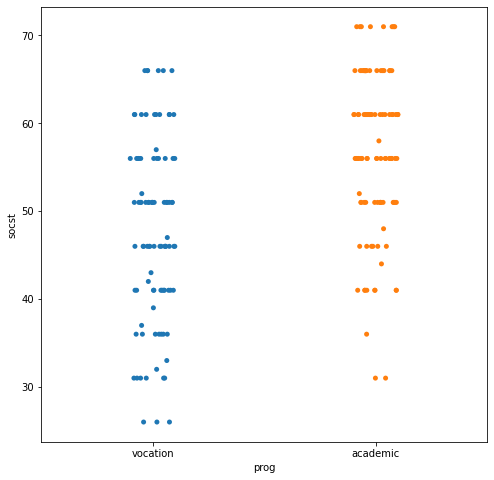

In [23]:
plt.figure(figsize=(8,8))
sns.stripplot(df["prog"], df['socst'], jitter=True) 
plt.show()

**Students who got marks above 70 in socst have chosen Academic Program and below 30 have chosen vocation**

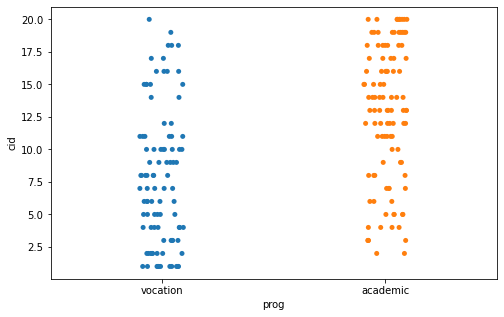

In [24]:
plt.figure(figsize=(8,5))
sns.stripplot(df["prog"], df['cid'], jitter=True) 
plt.show()

**Nearly Similar trend**

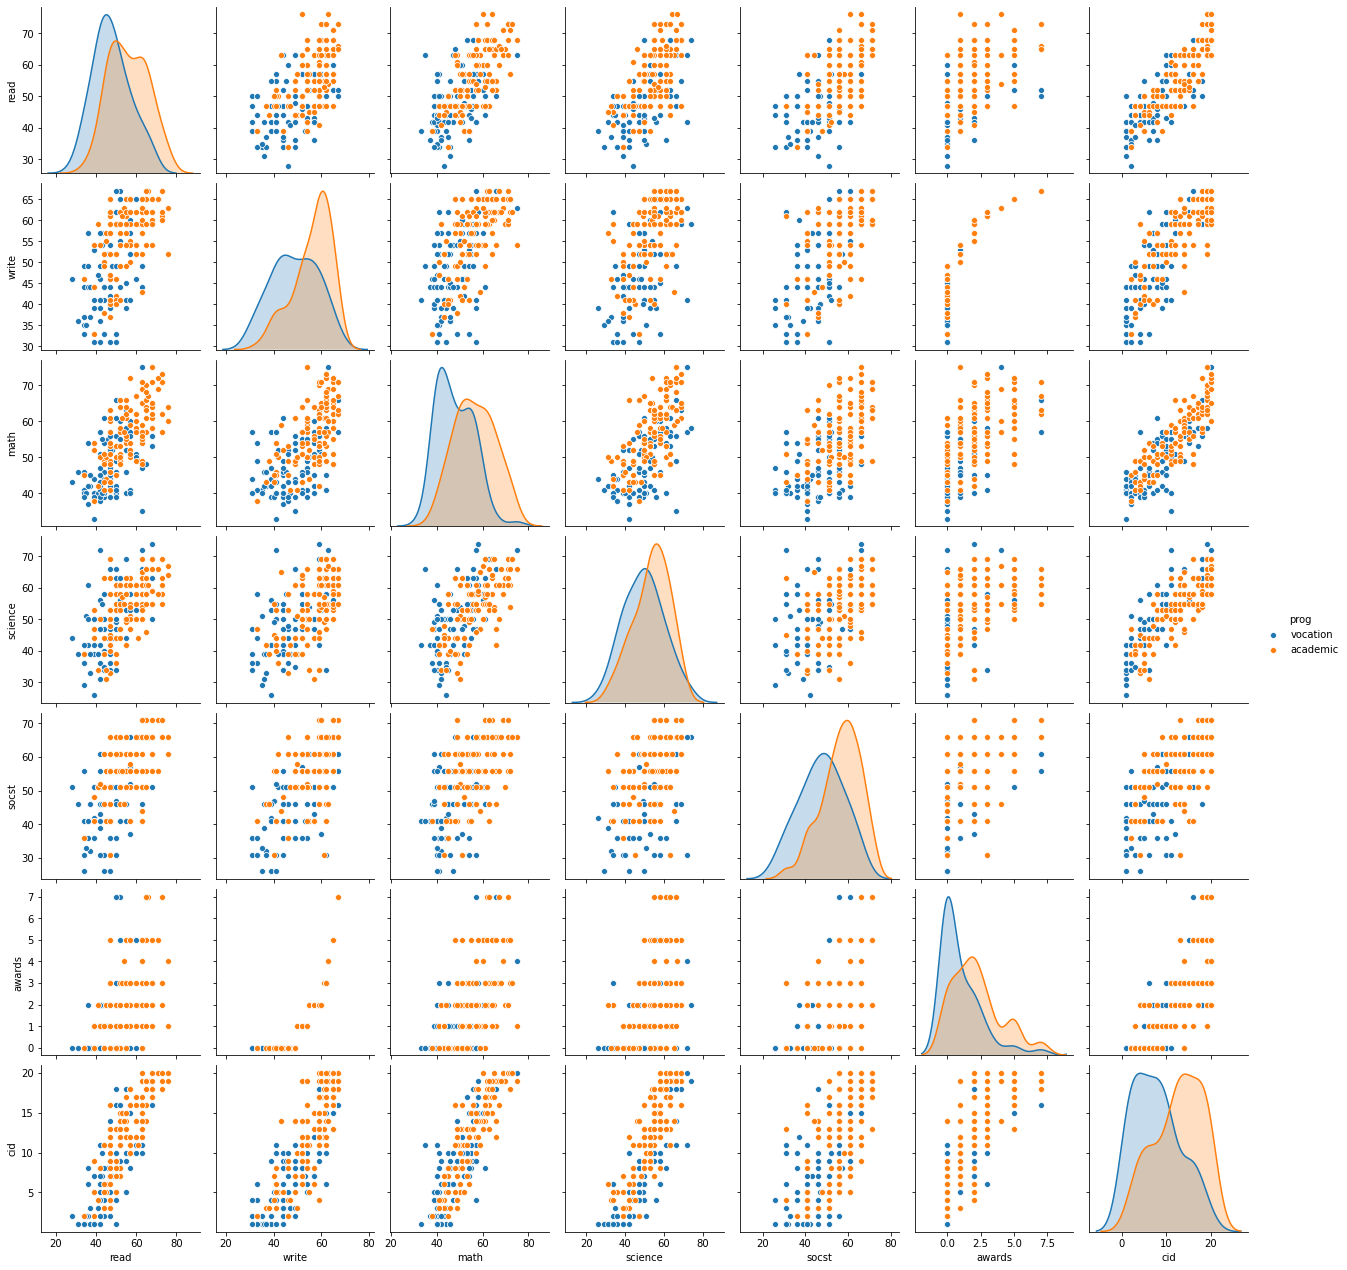

In [25]:
sns.pairplot(df,hue="prog")

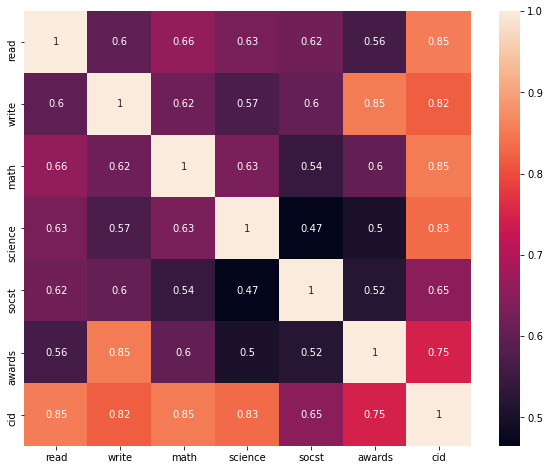

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Outlier Check

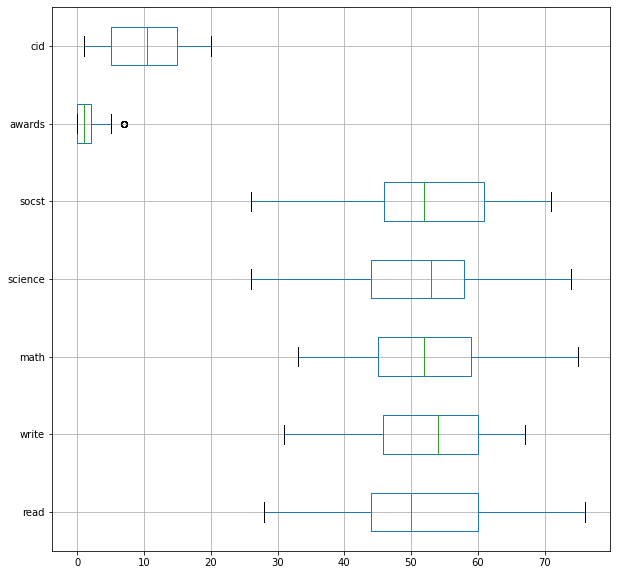

In [27]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

**There are nearly no outliers in most of the numerical columns, only outlier is in award variable. In Gaussian Naive Bayes, outliers will affect the shape of the Gaussian distribution and have the usual effects on the mean etc. So depending on our use case, it makes sense to remove outlier .**

### outlier treatment

In [28]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [29]:
lr,ur=remove_outlier(df["awards"])
df["awards"]=np.where(df["awards"]>ur,ur,df["awards"])
df["awards"]=np.where(df["awards"]<lr,lr,df["awards"])

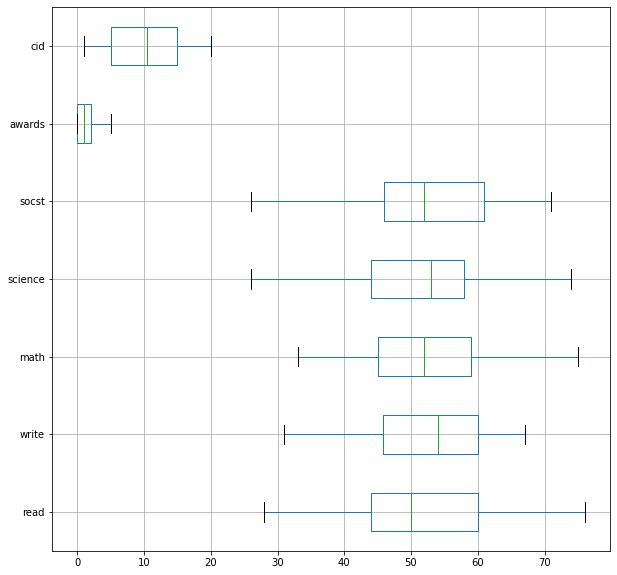

In [30]:
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)

**get_dummies of the object variables**

In [31]:
## Excluding prog

In [32]:
cat

['female', 'ses', 'schtyp', 'prog', 'honors']

In [33]:
cat1 = ['female', 'ses', 'schtyp', 'honors']

**Drop First is used to ensure that multiple columns created based on the levels of categorical variable are not included else it will result in to 
multicollinearity . This is done to ensure that we do not land in to dummy trap.**

In [34]:
df =pd.get_dummies(df, columns=cat1,drop_first=True)

In [35]:
df.shape

(200, 13)

**Train-Test Split**
Split X and y into training and test set in 70:30 ratio with random_state=1

In [36]:
# Arrange data into independent variables and dependent variables
X = df.drop("prog",axis=1)  ## Features
y = df["prog"]  ## Target

In [37]:

# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

**Gaussian Naive Bayes**

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [39]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. 
After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its 
parameters.

**Performance Matrix on train data set**

In [40]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.7428571428571429
[[54 16]
 [20 50]]
              precision    recall  f1-score   support

    academic       0.73      0.77      0.75        70
    vocation       0.76      0.71      0.74        70

    accuracy                           0.74       140
   macro avg       0.74      0.74      0.74       140
weighted avg       0.74      0.74      0.74       140



In [41]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.7333333333333333
[[25 10]
 [ 6 19]]
              precision    recall  f1-score   support

    academic       0.81      0.71      0.76        35
    vocation       0.66      0.76      0.70        25

    accuracy                           0.73        60
   macro avg       0.73      0.74      0.73        60
weighted avg       0.74      0.73      0.74        60



Accuracy of our Gaussian Naive Bayes model

In [42]:
NB_model.score(X_train, y_train)

0.7428571428571429

In [43]:
NB_model.score(X_test, y_test)

0.7333333333333333

**Looking at Recalls, Training accuracy and Test accuracy. Model seems to be performing well

## KNN Model

For naive bayes algorithm while calculating likelihoods of numerical features it assumes the feature to be normally distributed and then we calculate probability using mean and variance of that feature only and also it assumes that all the predictors are independent to each other. Scale doesn’t matter. Performing a features scaling in this algorithms may not have much effect.

**Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered**

Now lets apply zscore on continues columns and see the performance for KNN

In [44]:
# Arrange data into independent variables and dependent variables
X =  df.drop("prog",axis=1) ## Features
y = df["prog"]  ## Target

In [45]:
X[["read","write","math","science","socst","awards","cid"]]=X[["read","write","math","science","socst","awards","cid"]].apply(zscore)

In [46]:
X.head()

,read,write,math,science,socst,awards,cid,female_male,ses_low,ses_middle,schtyp_public,honors_not enrolled
0,-1.782489,-1.879986,-1.246121,-2.313665,-2.465701,-0.977356,-1.629618,0,1,0,1,1
1,-1.782489,-2.091517,-1.246121,-1.604883,-1.531900,-0.977356,-1.629618,1,0,1,1,1
2,-1.293600,-1.456923,-0.925094,-2.617428,-0.971620,-0.977356,-1.629618,1,0,0,1,1
3,-1.489156,-1.668454,-1.139112,-1.908647,-1.905421,-0.977356,-1.629618,1,1,0,1,1
4,-1.293600,-2.303048,-1.353130,-1.301120,-0.131199,-0.977356,-1.629618,1,0,1,1,1


In [47]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=10)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [49]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8
[[64 14]
 [14 48]]
              precision    recall  f1-score   support

    academic       0.82      0.82      0.82        78
    vocation       0.77      0.77      0.77        62

    accuracy                           0.80       140
   macro avg       0.80      0.80      0.80       140
weighted avg       0.80      0.80      0.80       140



In [50]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7333333333333333
[[21  6]
 [10 23]]
              precision    recall  f1-score   support

    academic       0.68      0.78      0.72        27
    vocation       0.79      0.70      0.74        33

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60



**Default value n_neighbors=5, lets check the performance for K=7**

In [51]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [52]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7928571428571428
[[67 11]
 [18 44]]
              precision    recall  f1-score   support

    academic       0.79      0.86      0.82        78
    vocation       0.80      0.71      0.75        62

    accuracy                           0.79       140
   macro avg       0.79      0.78      0.79       140
weighted avg       0.79      0.79      0.79       140



In [53]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7166666666666667
[[20  7]
 [10 23]]
              precision    recall  f1-score   support

    academic       0.67      0.74      0.70        27
    vocation       0.77      0.70      0.73        33

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



**Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error**

Hint: Misclassification error **(MCE) = 1 - Test accuracy score.** Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [54]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.35,
 0.2833333333333333,
 0.2666666666666667,
 0.2833333333333333,
 0.23333333333333328,
 0.21666666666666667,
 0.19999999999999996,
 0.18333333333333335,
 0.21666666666666667,
 0.19999999999999996]

**Plot misclassification error vs k (with k value on X-axis) using matplotli**

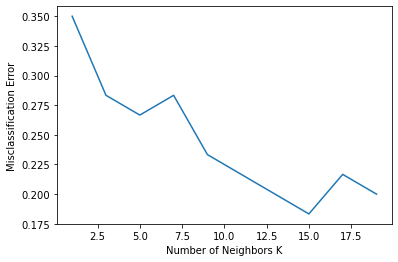

In [55]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K = 15 it is giving the best test accuracy lets check train and test for K=17 with other evaluation metrics

In [56]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [57]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.6928571428571428
[[62 16]
 [27 35]]
              precision    recall  f1-score   support

    academic       0.70      0.79      0.74        78
    vocation       0.69      0.56      0.62        62

    accuracy                           0.69       140
   macro avg       0.69      0.68      0.68       140
weighted avg       0.69      0.69      0.69       140



In [58]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8166666666666667
[[22  5]
 [ 6 27]]
              precision    recall  f1-score   support

    academic       0.79      0.81      0.80        27
    vocation       0.84      0.82      0.83        33

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



In [59]:
0.8166666666666667 - 0.6928571428571428

0.12380952380952381

**As the difference between train and test accuracies is 12.38 % which is more than 10%(Industry standard).So, we will look for the next best value of K. which is K=19**

In [60]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=19)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [61]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7142857142857143
[[63 15]
 [25 37]]
              precision    recall  f1-score   support

    academic       0.72      0.81      0.76        78
    vocation       0.71      0.60      0.65        62

    accuracy                           0.71       140
   macro avg       0.71      0.70      0.70       140
weighted avg       0.71      0.71      0.71       140



In [62]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8
[[22  5]
 [ 7 26]]
              precision    recall  f1-score   support

    academic       0.76      0.81      0.79        27
    vocation       0.84      0.79      0.81        33

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



In [63]:
0.8 - 0.7142857142857143

0.08571428571428574

**As the difference between train and test accuracies is less than 10%, it is a valid model**